# Regressão Linear
Aula prática de regressão linear. O objetivo é prever o custo da diária de um imóvel baseado no número de pessoas.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px # gráficos dinâmicos
import plotly.graph_objects as go # concatenização de gráficos
from sklearn.preprocessing import StandardScaler # padronização de dados
from sklearn.cluster import KMeans

In [8]:
base_custo_diaria = pd.read_csv('regressao_linear.csv', sep = ';')

In [9]:
base_custo_diaria.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             4           385
2             6           499
3            10           680
4            13           735
5            15           859
6            18           989
7            22          1075
8            25          1500
9            30          1850
10           40          2000
11           42          2089
12           45          2250
13           47          2488
14           50          2680>

In [10]:
# algumas estatísticas da base de dados
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


In [11]:
# todos os registros da primeira coluna e convertemos no formato array
x_custo_diaria = base_custo_diaria.iloc[:, 0].values
x_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [12]:
# teste: da linha 1 (segunda) a 5, coluna 0 (primeira)
base_custo_diaria.iloc[1:5, 0].values

array([ 4,  6, 10, 13])

In [13]:
# criando variável dependente (que queremos predizer)
y_custo_diaria = base_custo_diaria.iloc[:, 1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

# Correlação
Correlação positiva: quando duas variáveis que possuem correlação crescente ou descrescente simultanêas, ou seja, que possuem relação direta;
Correlação negativa: quando as duas variáveis possuem relação inversa.
Não ter correlação: quando uma não tem efeito sobre a outra.

In [14]:
# matriz de correlação
np.corrcoef(x_custo_diaria, y_custo_diaria)

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

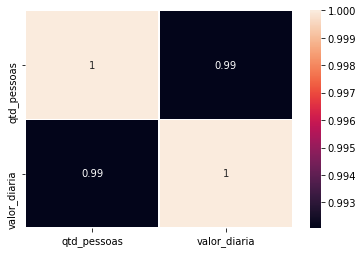

In [15]:
# forma de visualizar a correlação
correlation = base_custo_diaria.corr()
plot = sn.heatmap(correlation, annot = True, linewidths=.3)
plot

# Tratando os dados para o modelo
Nesse passo vamos realizar a transformação nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algorítmo solicita como entrada.

In [16]:
#visualizar o formato da variável
x_custo_diaria.shape

(15,)

In [17]:
x_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [18]:
x_custo_diaria = x_custo_diaria.reshape(-1, 1)
x_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [19]:
x_custo_diaria.shape

(15, 1)

In [20]:
from sklearn.linear_model import LinearRegression
previsao_custo_diaria = LinearRegression()
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

#Realizando o Treinamento do modelo
yi = a + bxi + ei

In [21]:
previsao_custo_diaria.fit(x_custo_diaria, y_custo_diaria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# constante alpha (a)
previsao_custo_diaria.intercept_

155.91874556932066

In [23]:
# constante beta (b)
previsao_custo_diaria.coef_

array([48.61472504])

In [24]:
# previsão de preços baseado nos números de pessoas
previsao_precos = previsao_custo_diaria.predict(x_custo_diaria)
previsao_precos

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

In [25]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [26]:
grafico.add_scatter(x = x_custo_diaria.ravel(), y = previsao_precos, name = 'previsões')
grafico.show()

Para prever um valor baseado na quantidade de pessoas:

In [27]:
qtd_pressoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pressoas

array([350.37764575])

In [28]:
qtd_pressoas = 8
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pressoas

array([544.83654593])

In [29]:
# pelo método:
previsao_custo_diaria.predict([[8]])

array([544.83654593])

In [30]:
# qualidade do modelo (quanto mais próximo de 1 melhor!)
previsao_custo_diaria.score(x_custo_diaria, y_custo_diaria)

0.9842009960646791

In [31]:
# visualizar erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_custo_diaria, previsao_precos)
mse

9989.829839426571

In [32]:
# RMSE
np.sqrt(mse)

99.9491362615334

In [33]:
# erro absoluto
mae = mean_absolute_error(y_custo_diaria, previsao_precos)
mae

83.84480977618742